# **Import Package**

In [2]:
# Pustaka untuk mengolah dan visualisasi data
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

# **Data Loading**

In [3]:
#Menampilkan dataset
import pandas as pd
nel = pd.read_csv('animedataset.csv')
nel


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...


# **EDA (Exploratory Data Analysis)**

In [4]:
#Menampilkan info dataset
nel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

**Ringkasan:**
* terdapat 24 kolom dan 24905 baris
* terdapat 20 kolom dengan tipe data object dan 4 kolom dengan tipe data int(64)
* Berdasarkan data tersebut bisa disimpulkan bahwa terdapat 20 fitur kategori dan 4 fitur numerik.



**Penjelasan kolom dataframe:**

* anime_id: ID unik yang digunakan untuk mengidentifikasi setiap entri anime dalam dataset.

* Name: Nama asli anime dalam bahasa Jepang atau sebagaimana tertulis di sumber asli.

* English name: Nama anime dalam bahasa Inggris, jika tersedia.

* Other name: Nama lain atau alternatif dari anime, termasuk terjemahan atau nama pendek.

* Score: Skor rata-rata yang diberikan oleh pengguna terhadap anime tersebut (format saat ini adalah string dan perlu dikonversi ke numerik).

* Genres: Daftar genre yang menggambarkan kategori atau tema utama dari anime (misalnya Action, Comedy, Romance).

* Synopsis: Ringkasan cerita atau sinopsis dari anime.

* Type: Jenis format dari anime, seperti TV, Movie, OVA, ONA, atau Special.

* Episodes: Jumlah total episode yang dimiliki oleh anime (dalam format string dan mungkin perlu dibersihkan).

* Aired: Periode waktu penayangan anime, biasanya berupa rentang tanggal mulai dan berakhirnya.

* Premiered: Musim dan tahun rilis awal anime, seperti "Spring 2012" atau "Fall 2020".

* Status: Status penayangan anime, misalnya "Finished Airing", "Currently Airing", atau "Not yet aired".

* Producers: Perusahaan atau individu yang terlibat dalam pendanaan dan produksi anime.

* Licensors: Pihak yang memiliki hak lisensi distribusi anime, biasanya untuk wilayah luar Jepang.

* Studios: Studio animasi yang memproduksi anime.

* Source: Sumber cerita asli dari anime, seperti manga, light novel, game, atau original.

* Duration: Durasi penayangan rata-rata per episode, misalnya "24 min. per ep."

* Rating: Kategori usia penonton yang disarankan, seperti PG-13, R+, atau G.

* Rank: Peringkat anime berdasarkan skor dibandingkan dengan anime lainnya (berformat string, perlu dibersihkan jika ingin dianalisis secara numerik).

* Popularity: Peringkat popularitas berdasarkan jumlah anggota atau pengguna yang menambahkan anime ke daftar mereka.

* Favorites: Jumlah pengguna yang menandai anime tersebut sebagai favorit.

* Scored By: Jumlah pengguna yang memberikan skor pada anime (masih dalam format string, perlu dikonversi ke numerik).

* Members: Jumlah total pengguna yang menambahkan anime ke dalam daftar mereka (watching, completed, plan to watch, dll.).

* Image URL: Link ke gambar atau poster anime.

Pada proyek sistem rekomendasi ini, meskipun dataset yang tersedia memiliki banyak fitur informatif, hanya beberapa fitur utama yang akan difokuskan untuk membangun model rekomendasi yang efisien dan sederhana. Fitur-fitur yang dipilih meliputi:

* Name: sebagai identitas utama dari anime,

* Score: untuk merepresentasikan penilaian atau preferensi pengguna,

* Genres: sebagai indikator utama konten dan tema,

* Type: untuk mengetahui jenis rilis (TV, Movie, dll),

* Studios: untuk mempertimbangkan kualitas dan gaya produksi yang khas dari masing-masing studio.


Pemilihan fitur ini didasarkan pada asumsi bahwa karakteristik konten (genre dan studio) serta persepsi pengguna (score) merupakan faktor penting dalam menentukan kemiripan antar anime.

Dalam pendekatan Content-Based Filtering, sistem akan merekomendasikan anime berdasarkan kemiripan konten, seperti genre dengan anime yang disukai pengguna sebelumnya. Sedangkan KNN  sistem akan merekomendasikan anime berdasarkan ke,iripan konten seperti fitur Name, Genres, Type, Score dan Studios menjadi kunci utama dalam proses ini.

Meskipun terdapat fitur-fitur tambahan seperti sinopsis, tanggal penayangan, atau jumlah episode yang juga berpotensi meningkatkan performa model, fitur-fitur tersebut tidak dimanfaatkan dalam tahap awal ini demi menjaga kompleksitas tetap rendah. Namun, fitur tambahan tersebut dapat dijadikan bahan eksplorasi pada pengembangan model di masa mendatang.



In [5]:
# Cek kolom dengan duplicate
nel.duplicated().sum()

np.int64(0)

Dataset tersebut tidak memiliki duplikat sehingga bisa dilanjutkan untuk memeriksa apakah data mengalami missing value.

In [6]:
# Cek kolom dengan missing value
nel.isnull().sum()


,0
anime_id,0
Name,0
English name,0
Other name,0
Score,0
Genres,0
Synopsis,0
Type,0
Episodes,0
Aired,0


Dataset tersebut tidak mengalami missing value sehingga bisa dilanjutkan dengan tahap visualisasi agar kita bisa mendapatkan beberapa highlight dari dataset yang kita gunakan.

## **Visualisasi**

<ipython-input-7-54a36fef9018>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_genres.values, y=all_genres.index, palette='viridis')


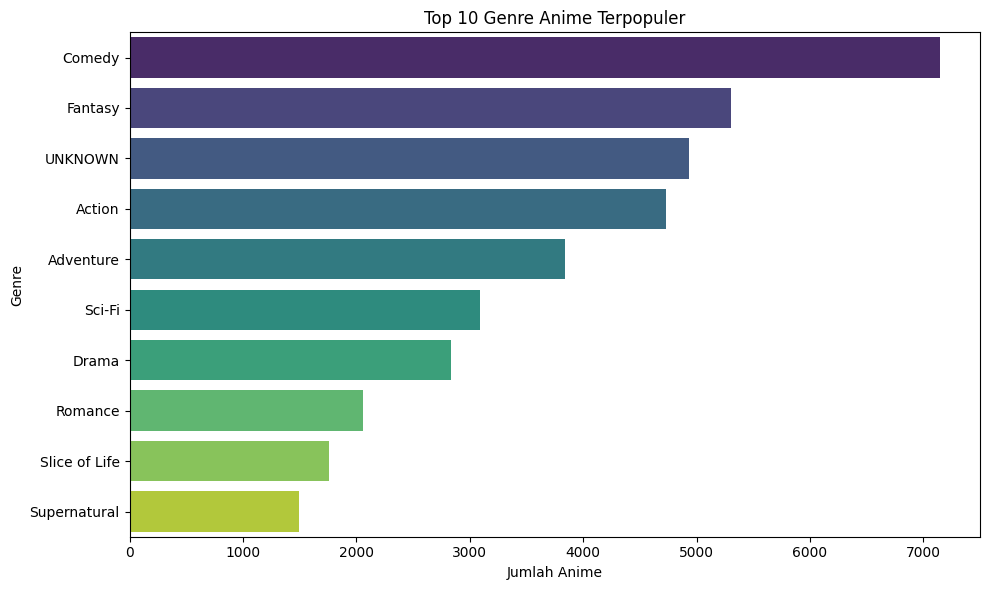

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan genre yang dipisahkan koma dan hitung frekuensinya
genre_series = nel['Genres'].dropna().str.split(', ')
all_genres = genre_series.explode().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=all_genres.values, y=all_genres.index, palette='viridis')
plt.title('Top 10 Genre Anime Terpopuler')
plt.xlabel('Jumlah Anime')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


**Interpretasi & Insight:**

* **Dominasi Genre Umum:** Terlihat jelas bahwa genre Comedy menempati posisi teratas sebagai genre yang paling sering muncul, diikuti oleh Action, Fantasy, dan Adventure. Ini menunjukkan bahwa sebagian besar anime dalam dataset cenderung memiliki elemen-elemen ini, yang mencerminkan popularitas genre-genre tersebut di kalangan penonton secara luas.

* **Keberagaman Menengah:** Genre seperti Drama, Sci-Fi, dan Romance juga memiliki frekuensi yang signifikan, menunjukkan keberagaman konten yang cukup baik meskipun ada dominasi genre teratas.

* **Genre Spesifik Populer:** Kehadiran School, Shounen, dan Slice of Life dalam 10 besar menandakan adanya segmen pasar atau tipe cerita yang kuat dan sering diproduksi dalam industri anime.

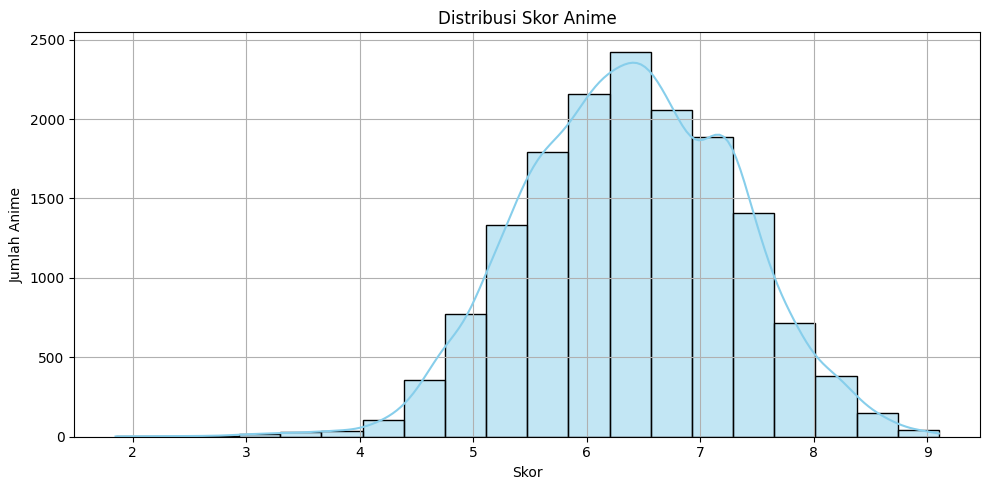

In [8]:
# Pastikan kolom Score dalam bentuk float
nel['Score'] = pd.to_numeric(nel['Score'], errors='coerce')

# Plot ulang dengan bins yang wajar
plt.figure(figsize=(10,5))
sns.histplot(nel['Score'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribusi Skor Anime')
plt.xlabel('Skor')
plt.ylabel('Jumlah Anime')
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretasi dan Insight:**

* **Distribusi skor anime berbentuk normal**, dengan mayoritas skor berada di antara 6 hingga 7, dan puncaknya sekitar 6.5. Ini menunjukkan bahwa sebagian besar anime memiliki kualitas yang tergolong baik.

* **Anime dengan skor sangat rendah (< 4) dan sangat tinggi (> 8.5)** sangat jarang ditemukan, menunjukkan konsistensi kualitas dalam industri anime.

* **Skor dapat digunakan sebagai indikator awal dalam sistem rekomendasi**, dengan menetapkan threshold (misalnya skor ≥ 6) untuk memfilter anime yang layak direkomendasikan kepada pengguna.

<ipython-input-9-4fb9ad041e8c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Name', data=top_anime, palette='viridis')


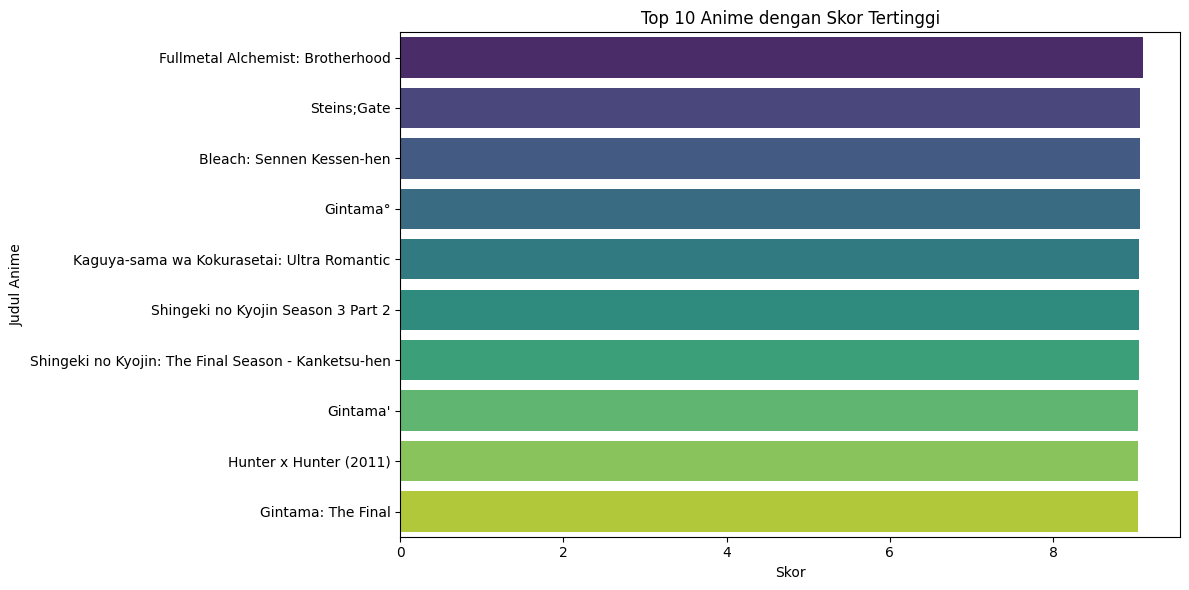

In [9]:
top_anime = nel[nel['Score'].notna()].sort_values(by='Score', ascending=False)
top_anime = top_anime[top_anime['Score'] > 0]
top_anime = top_anime.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Score', y='Name', data=top_anime, palette='viridis')
plt.title('Top 10 Anime dengan Skor Tertinggi')
plt.xlabel('Skor')
plt.ylabel('Judul Anime')
plt.tight_layout()
plt.show()


**Interpretasi dan Insight:**

* **Fullmetal Alchemist:** Brotherhood menempati posisi teratas dengan skor tertinggi, yang menunjukkan popularitas dan kualitas cerita serta produksi yang sangat diakui oleh komunitas anime global.

* **Seri Gintama mendominasi daftar**, muncul sebanyak tiga kali dalam berbagai versi/sekuel, menunjukkan kekuatan fanbase yang besar dan konsistensi kualitas dari seri ini.

* **Genre action dan psychological** tampak dominan dalam daftar ini (misalnya: Steins;Gate, Attack on Titan, Hunter x Hunter), memberikan insight bahwa genre tersebut sangat disukai dan cenderung mendapat skor tinggi dari penonton.

<ipython-input-10-a21282053f46>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=nel, y='Type', order=nel['Type'].value_counts().index, palette='Set2')


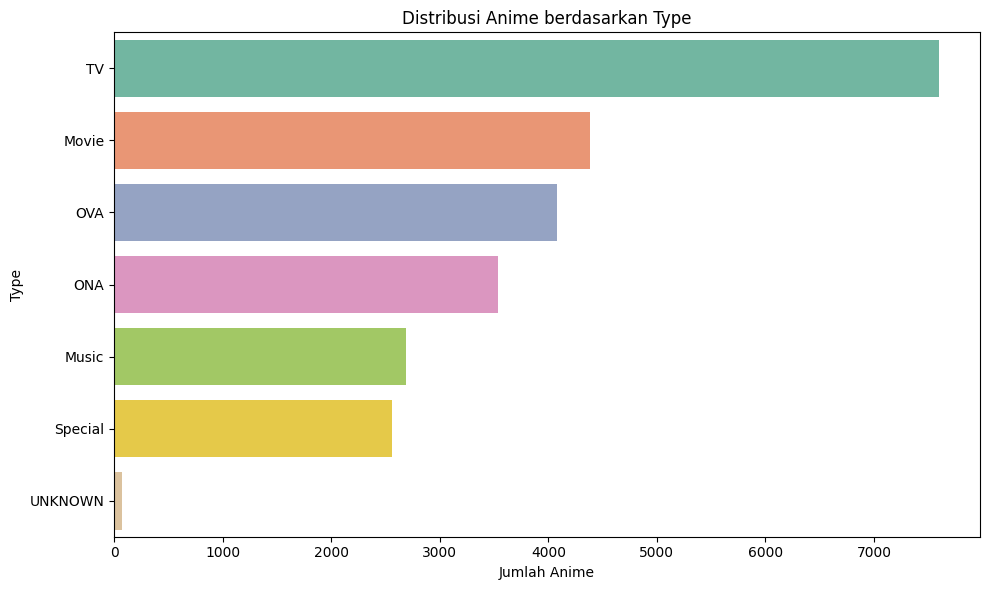

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=nel, y='Type', order=nel['Type'].value_counts().index, palette='Set2')
plt.title('Distribusi Anime berdasarkan Type')
plt.xlabel('Jumlah Anime')
plt.ylabel('Type')
plt.tight_layout()
plt.show()


**Interpretasi dan Insight:**

* **Anime berformat TV** merupakan tipe paling dominan, dengan jumlah lebih dari 7.500 judul. Ini menunjukkan bahwa serial televisi adalah format paling umum dalam industri anime, kemungkinan karena memungkinkan pengembangan cerita yang lebih panjang dan mendalam.

* **Movie, OVA, dan ONA** juga cukup banyak diproduksi, menandakan bahwa format pendek seperti OVA dan ONA tetap memiliki pasar tersendiri, mungkin untuk eksperimen kreatif atau sebagai pendamping dari serial utama.

* **Kategori UNKNOWN** sangat sedikit dan bisa dianggap noise. Untuk keperluan analisis lanjutan, data dengan label UNKNOWN sebaiknya dipertimbangkan untuk dibersihkan atau dikecualikan agar tidak mengganggu hasil insight lainnya.

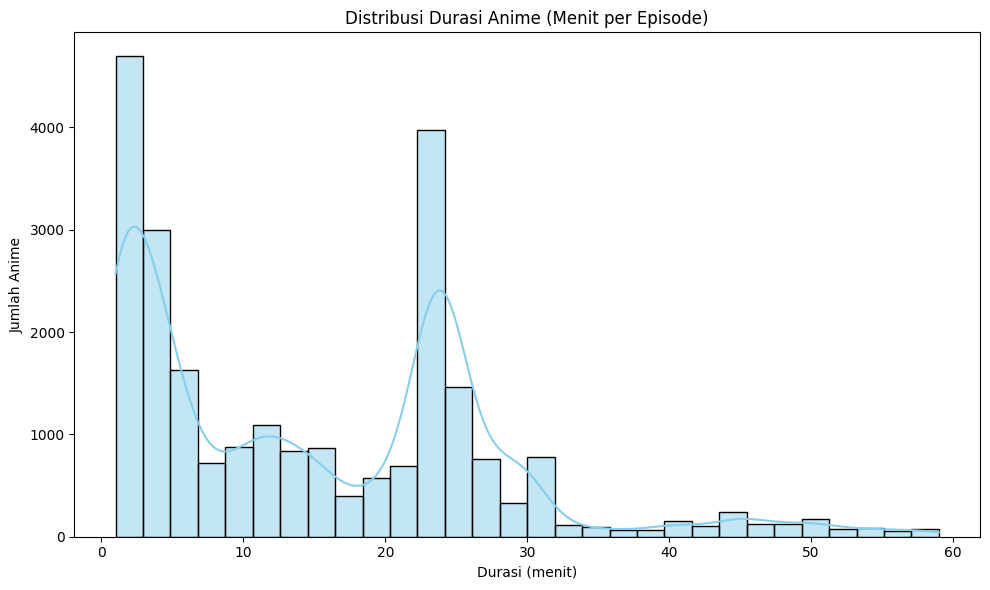

In [11]:
# Ekstrak durasi angka dari string (dalam menit)
nel['Durasi_menit'] = nel['Duration'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10,6))
sns.histplot(nel['Durasi_menit'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribusi Durasi Anime (Menit per Episode)')
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah Anime')
plt.tight_layout()
plt.show()


**Interpretasi dan Insight:**

* **Durasi paling umum** adalah sekitar 1–5 menit dan 24 menit per episode, dengan dua puncak distribusi yang sangat jelas. Ini menunjukkan bahwa anime didominasi oleh dua format durasi utama: anime pendek (biasanya ONA/OVA/special) dan durasi standar siaran TV (sekitar 24 menit).

* **Distribusi menunjukkan bentuk bimodal**, menandakan adanya dua kategori produksi yang berbeda secara signifikan: anime pendek untuk konten eksperimental atau humor ringan, dan anime standar untuk cerita penuh.

* **Durasi di atas 30 menit sangat jarang**, menandakan bahwa episode panjang (misalnya film berdurasi penuh yang dibagi menjadi bagian-bagian) merupakan pengecualian dan bukan format umum di industri anime.

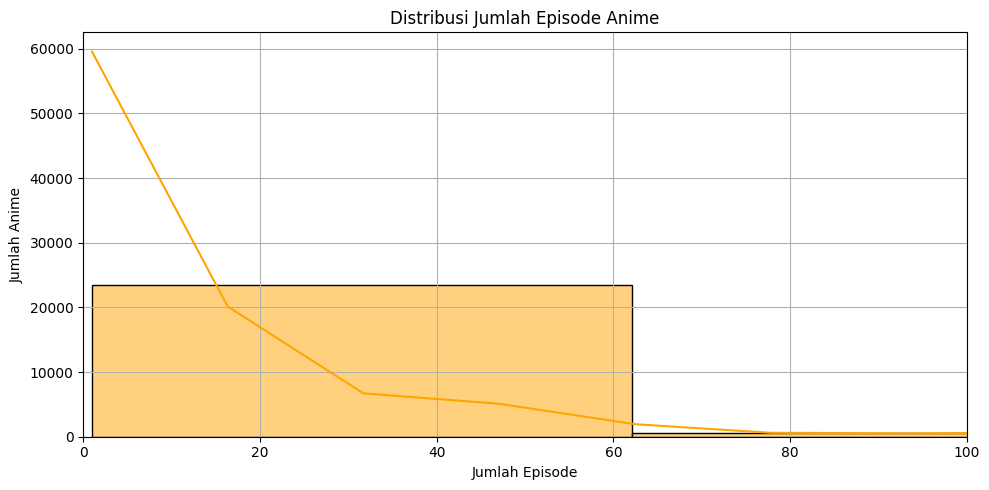

In [12]:
nel['Episodes'] = pd.to_numeric(nel['Episodes'], errors='coerce')
plt.figure(figsize=(10,5))
sns.histplot(nel['Episodes'].dropna(), bins=50, kde=True, color='orange')
plt.title('Distribusi Jumlah Episode Anime')
plt.xlabel('Jumlah Episode')
plt.ylabel('Jumlah Anime')
plt.xlim(0, 100)  # Biar gak keganggu anime super panjang
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretasi dan Insight:**

* **Mayoritas anime memiliki episode sangat sedikit (1–12 episode)**, yang umumnya berasal dari format pendek seperti OVA, ONA, atau mini series. Ini menunjukkan tren dominasi anime pendek di industri.

* **Jumlah anime menurun drastis seiring bertambahnya jumlah episode**, menunjukkan bahwa anime dengan episode panjang (30 ke atas) adalah minoritas dan lebih jarang diproduksi karena biaya dan durasi produksi yang lebih besar.

* **Distribusi bersifat right-skewed (condong ke kanan)**, artinya anime dengan jumlah episode tinggi seperti One Piece atau Naruto adalah outlier dan tidak mencerminkan mayoritas tren produksi anime.

<ipython-input-13-3333dbc46eed>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nel['Year'] = pd.to_datetime(nel['Aired'], errors='coerce').dt.year


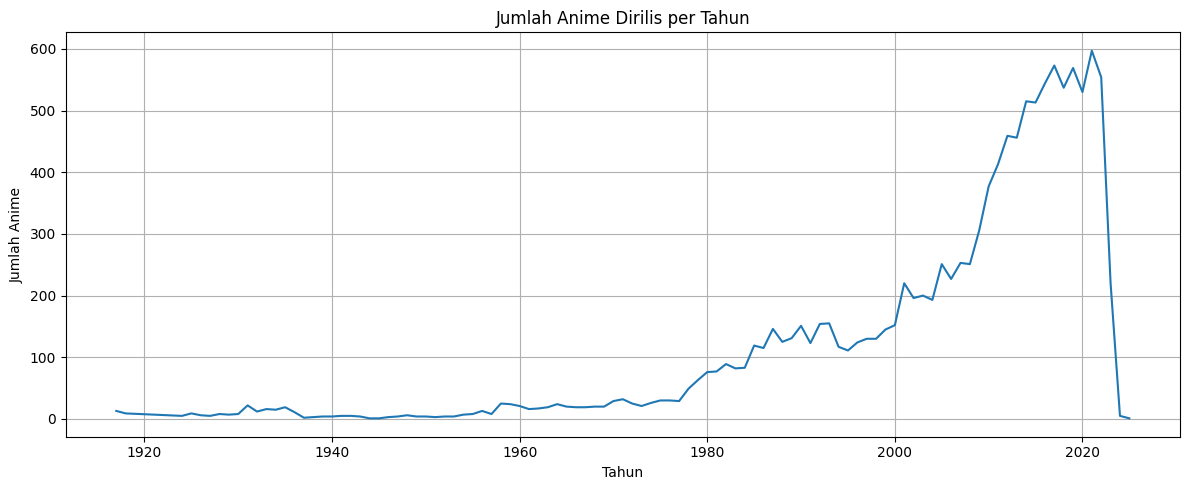

In [13]:
# Pastikan kolom Aired atau Year diolah dengan benar
nel['Year'] = pd.to_datetime(nel['Aired'], errors='coerce').dt.year

yearly_anime = nel['Year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=yearly_anime.index, y=yearly_anime.values)
plt.title('Jumlah Anime Dirilis per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Anime')
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretasi dan Insight dari Grafik:**

1. **Pertumbuhan Lambat (1900–1980-an):**
* Hampir tidak ada anime dirilis secara masif sebelum tahun 1980.
* Ini wajar karena industri anime modern baru benar-benar berkembang setelah teknologi animasi membaik dan TV menjadi umum.

2. **Peningkatan Signifikan (1980–2000-an):**
* Ada kenaikan stabil sejak 1980-an. Ini seiring dengan popularitas global anime dan pertumbuhan studio seperti Ghibli, Toei, dll.

3. **Puncak Produksi (2010–2021):**
* Jumlah rilisan melonjak pesat, bahkan mencapai lebih dari 600 judul per tahun.
* Bisa dikaitkan dengan era digital, streaming platform (Crunchyroll, Netflix), dan lonjakan minat global terhadap anime.

4. **Penurunan Tajam Setelah 2021:**
* Data tahun 2022 ke atas menunjukkan penurunan drastis, kemungkinan besar data belum lengkap atau belum diupdate, bukan karena produksi menurun drastis.



<ipython-input-14-bdae3dbeb2fe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Members', y='Name', data=top_members, palette='coolwarm')


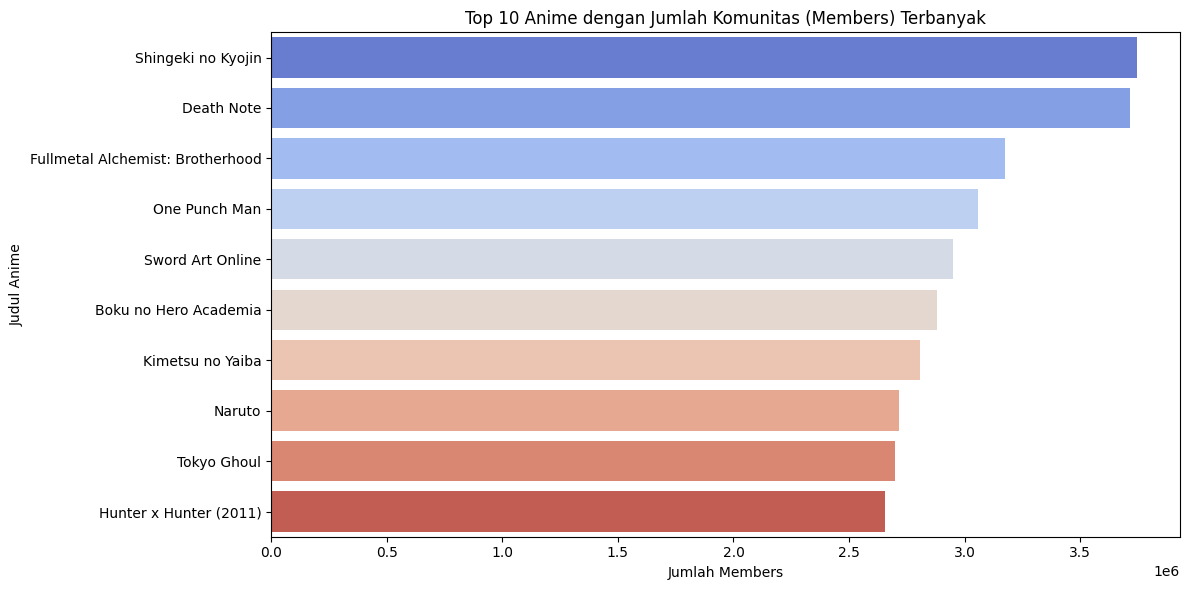

In [14]:
# Ubah kolom Members menjadi numerik (kalau belum)
nel['Members'] = pd.to_numeric(nel['Members'], errors='coerce')

# Ambil 10 anime dengan members terbanyak
top_members = nel.sort_values(by='Members', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Members', y='Name', data=top_members, palette='coolwarm')
plt.title('Top 10 Anime dengan Jumlah Komunitas (Members) Terbanyak')
plt.xlabel('Jumlah Members')
plt.ylabel('Judul Anime')
plt.tight_layout()
plt.show()


**Interpretasi dan Insight:**

1. **Anime Paling Populer secara Komunitas:**
* Shingeki no Kyojin (Attack on Titan) dan Death Note berada di puncak dengan lebih dari 3,7 juta members, menunjukkan betapa besarnya komunitas penggemar mereka di platform seperti MyAnimeList.
* Keduanya memiliki dampak global yang besar, bahkan menembus pasar non-anime biasa.

2. **Anime Shounen Dominasi Daftar:**
* 90% dari anime yang masuk top 10 berasal dari genre shounen atau aksi, memperlihatkan daya tarik genre ini yang sangat kuat di kalangan komunitas global.

3. **Keberadaan Anime Lama dan Baru:**
* Ada anime lama seperti Naruto dan Death Note, tapi juga ada yang relatif baru seperti Kimetsu no Yaiba dan Boku no Hero Academia, yang menunjukkan pertumbuhan komunitas tidak hanya tergantung usia anime.



<ipython-input-15-d43745a45ea0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jumlah_Anime', y='Studios', data=top_studios, palette='viridis')


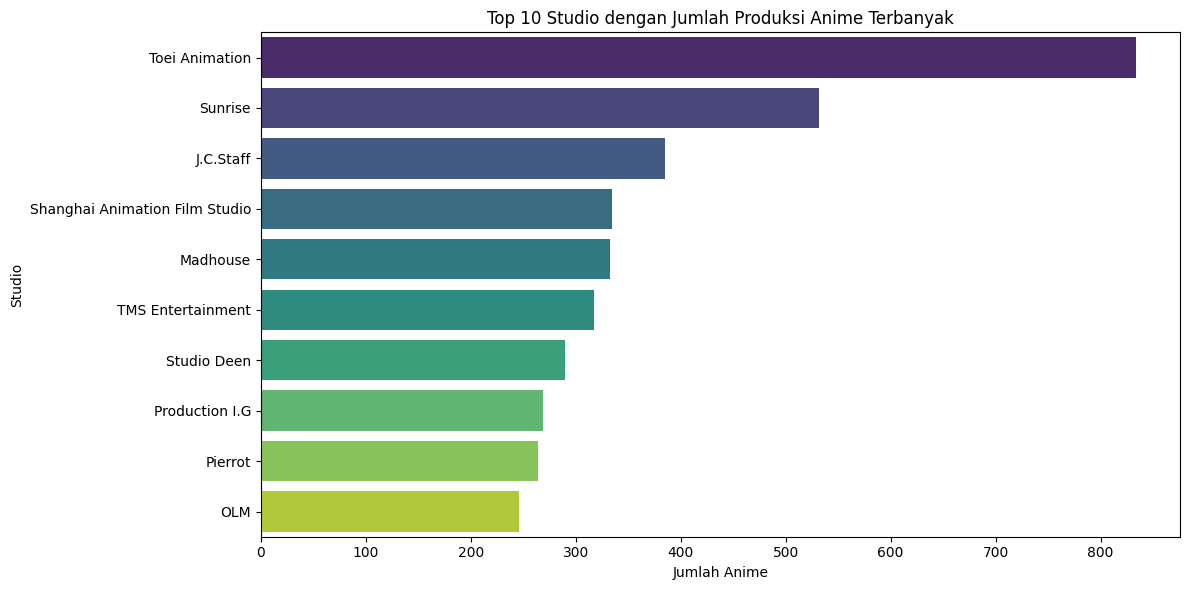

In [15]:
# Buang entri UNKNOWN
filtered_studio = nel[nel['Studios'].str.lower() != 'unknown']

# Hitung dan ambil top 10
top_studios = filtered_studio['Studios'].value_counts().head(10).reset_index()
top_studios.columns = ['Studios', 'Jumlah_Anime']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Jumlah_Anime', y='Studios', data=top_studios, palette='viridis')
plt.title('Top 10 Studio dengan Jumlah Produksi Anime Terbanyak')
plt.xlabel('Jumlah Anime')
plt.ylabel('Studio')
plt.tight_layout()
plt.show()



**Interpretasi dan Insight**:

1. **Toei Animation sebagai Studio Paling Produktif**
* Toei Animation menempati posisi teratas dengan lebih dari 800 judul anime, jauh mengungguli studio lain. Ini menunjukkan dominasi kuat Toei dalam industri anime, yang dikenal memproduksi serial populer seperti One Piece dan Dragon Ball.

2. **Kompetisi Ketat di Antara Studio Menengah**
* Studio seperti Sunrise, J.C. Staff, dan Madhouse memiliki jumlah produksi yang relatif berdekatan, berkisar antara 300–500 judul. Ini menunjukkan persaingan ketat di antara studio menengah yang tetap aktif dan produktif dalam industri.

3. **Studio Tertua Cenderung Lebih Banyak Produksi**
* Mayoritas studio yang masuk 10 besar adalah studio yang telah berdiri sejak era 70–80-an, yang memungkinkan mereka membangun portofolio besar seiring waktu. Ini menandakan bahwa umur studio berkontribusi signifikan terhadap total produksi.



# **Data Cleaning**

In [16]:
# Cek kolom dengan duplicate
nel.duplicated().sum()

np.int64(0)

In [17]:
# Cek kolom dengan missing value
nel.isnull().sum()

,0
anime_id,0
Name,0
English name,0
Other name,0
Score,9213
Genres,0
Synopsis,0
Type,0
Episodes,611
Aired,0


In [18]:
# Daftar kolom yang akan di-drop akibat dari visualisasi sehingga terdapat penambahan kolom
drop_cols = ['Durasi_menit','Year']

# Drop kolom
nel.drop(columns=drop_cols, inplace=True)

In [19]:
# Ganti 'Unknown' dengan NaN
nel['Score'] = nel['Score'].replace('UNKNOWN', np.nan)
nel['Episodes']=nel['Episodes'].replace('UNKNOWN',np.nan)
nel.dropna(subset=['Score', 'Episodes'], inplace=True)


In [20]:
# Cek kolom dengan missing value
nel.isnull().sum()

,0
anime_id,0
Name,0
English name,0
Other name,0
Score,0
Genres,0
Synopsis,0
Type,0
Episodes,0
Aired,0


In [21]:
nel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15604 entries, 0 to 24856
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      15604 non-null  int64  
 1   Name          15604 non-null  object 
 2   English name  15604 non-null  object 
 3   Other name    15604 non-null  object 
 4   Score         15604 non-null  float64
 5   Genres        15604 non-null  object 
 6   Synopsis      15604 non-null  object 
 7   Type          15604 non-null  object 
 8   Episodes      15604 non-null  float64
 9   Aired         15604 non-null  object 
 10  Premiered     15604 non-null  object 
 11  Status        15604 non-null  object 
 12  Producers     15604 non-null  object 
 13  Licensors     15604 non-null  object 
 14  Studios       15604 non-null  object 
 15  Source        15604 non-null  object 
 16  Duration      15604 non-null  object 
 17  Rating        15604 non-null  object 
 18  Rank          15604 non-null  o

In [22]:
nel.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,15604.0,22115.650602,16921.284550,1.00,5059.00,21344.000,37026.25,55676.0
Score,15604.0,6.379708,0.929497,1.85,5.73,6.385,7.06,9.1
Episodes,15604.0,11.309728,48.319844,1.00,1.00,2.000,12.00,3057.0
Popularity,15604.0,8205.694181,4917.592740,1.00,3986.25,8063.500,12167.00,19191.0
Favorites,15604.0,672.859972,5247.517419,0.00,1.00,7.000,60.25,217606.0
Members,15604.0,58412.978531,194120.999704,180.00,1165.75,4935.500,27127.00,3744541.0


**Fungsi describe**() memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom.
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah). - * * 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

# **Data Preparation**

In [23]:
import re

def text_cleaning(text):
  text = re.sub(r"[^\w\s]", "", text)
  text = re.sub(r"https?://[^\s]+", "", text)
  return text

nel['Name'] = nel['Name'].apply(text_cleaning)

#Membuang url yang tidak akan digunakan

In [24]:
#Membuang kolom yang tidak akan digunakan untuk model
columns_to_drop = ['anime_id',
    'English name',
    'Other name',
    'Episodes',
    'Synopsis',
    'Aired',
    'Premiered',
    'Status',
    'Producers',
    'Licensors',
    'Duration',
    'Source',
    'Rating',
    'Rank',
    'Popularity',
    'Favorites',
    'Scored By',
    'Members',
    'Image URL']
nel.drop(columns=columns_to_drop, inplace=True)

In [25]:
# memeriksa dataframe nel terbaru
nel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15604 entries, 0 to 24856
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     15604 non-null  object 
 1   Score    15604 non-null  float64
 2   Genres   15604 non-null  object 
 3   Type     15604 non-null  object 
 4   Studios  15604 non-null  object 
dtypes: float64(1), object(4)
memory usage: 731.4+ KB


In [27]:
# 1. Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

In [28]:
# 2. Melakukan perhitungan idf pada data genre
tf.fit(nel['Genres'])

TfidfVectorizer()

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Drop NaN pada fitur yang akan digunakan
nel_clean = nel.dropna(subset=['Score', 'Type', 'Studios']).copy()
nel_clean.reset_index(drop=True, inplace=True)

In [30]:
# 2. One-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoded = encoder.fit_transform(nel_clean[['Type', 'Studios']]).toarray()
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Type', 'Studios']))

In [31]:
# 3. Gabungkan dengan Score
features = pd.concat([nel_clean[['Score']].reset_index(drop=True), encoded_df], axis=1)

In [32]:
# 4. Pastikan tidak ada NaN
assert features.isnull().sum().sum() == 0, "Masih ada NaN!"

In [33]:
# 5. Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# **Model Development**

## **Model Content Based Filtering**

In [34]:
nel

,Name,Score,Genres,Type,Studios
0,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,Sunrise
1,Cowboy Bebop Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,Bones
2,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,Madhouse
3,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,Sunrise
4,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,Toei Animation
...,...,...,...,...,...
24590,Li Shi Zhentan Shiwusuo A Day in Lungmen Home...,5.99,"Action, Comedy, Mystery",ONA,"HMCH, Gravity Well"
24635,Slash,6.45,UNKNOWN,Music,UNKNOWN
24729,The IDOLMSTER Cinderella Girls U149 Recap,6.07,UNKNOWN,Special,CygamesPictures
24831,One Piece Dai Gekisen Tokushuu Hangeki Doumei ...,6.29,"Action, Adventure, Comedy, Fantasy",Special,UNKNOWN


In [35]:
tf.get_feature_names_out()

array(['action', 'adventure', 'avant', 'award', 'boys', 'comedy', 'drama',
       'ecchi', 'erotica', 'fantasy', 'fi', 'garde', 'girls', 'gourmet',
       'hentai', 'horror', 'life', 'love', 'mystery', 'of', 'romance',
       'sci', 'slice', 'sports', 'supernatural', 'suspense', 'unknown',
       'winning'], dtype=object)

In [36]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(nel['Genres'])

In [37]:
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(15604, 28)

In [38]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.26925895, 0.        , 0.        , ..., 0.        , 0.        ,
         0.59937558],
        [0.507496  , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.43687362, 0.50887317, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.48089176, 0.56014577, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
         0.        ]])

In [73]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=nel.Genres
).sample(22, axis=1).sample(10, axis=0)

,sci,gourmet,mystery,erotica,avant,adventure,comedy,supernatural,award,garde,...,suspense,fi,boys,slice,of,fantasy,ecchi,life,love,sports
Genres,,,,,,,,,,,,,,,,,,,,,
"Action, Comedy",0.0,0.0,0.000000,0.0,0.000000,0.0,0.667241,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
"Comedy, Slice of Life",0.0,0.0,0.000000,0.0,0.000000,0.0,0.324515,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.546104,0.546104,0.000000,0.00000,0.546104,0.0,0.000000
Hentai,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
"Comedy, Sports",0.0,0.0,0.000000,0.0,0.000000,0.0,0.442548,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.896745
"Comedy, Slice of Life",0.0,0.0,0.000000,0.0,0.000000,0.0,0.324515,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.546104,0.546104,0.000000,0.00000,0.546104,0.0,0.000000
"Fantasy, Horror, Mystery, Supernatural",0.0,0.0,0.540194,0.0,0.000000,0.0,0.000000,0.46942,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.343436,0.00000,0.000000,0.0,0.000000
Avant Garde,0.0,0.0,0.000000,0.0,0.707107,0.0,0.000000,0.00000,0.0,0.707107,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
"Action, Fantasy",0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.733548,0.00000,0.000000,0.0,0.000000
"Drama, Fantasy, Romance",0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.510719,0.00000,0.000000,0.0,0.000000


In [74]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.5305637 , 0.45673125, ..., 0.        , 0.12948441,
        0.        ],
       [0.5305637 , 1.        , 0.86084151, ..., 0.        , 0.24405064,
        0.        ],
       [0.45673125, 0.86084151, 1.        , ..., 0.        , 0.49513208,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.12948441, 0.24405064, 0.49513208, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [41]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=nel['Name'], columns=nel['Name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (15604, 15604)


Name,Seitokai Yakuindomo OVA,Yichang Shengwu Jianwenlu,Aggressive Retsuko ONA 5th Season,Shounen Hollywood Holly Stage for 50,Decadence Remix
Name,,,,,
Super Speed,0.000000,0.0,0.000000,0.00000,1.0
Kamisama Hajimemashita,0.464626,0.0,0.464626,0.00000,0.0
Ganbare Doukichan,0.468600,0.0,0.468600,0.00000,0.0
Hina no Uta,0.000000,0.0,0.000000,0.00000,1.0
Coffee Break,0.000000,0.0,0.000000,0.00000,0.0
Piace Watashi no Italian,0.239767,0.0,0.239767,0.69886,0.0
Mu Wang Zhi Wang Han Tie Dou,0.000000,0.0,0.000000,0.00000,0.0
StarJewel,0.000000,0.0,0.000000,0.00000,0.0
Battle Can²,0.000000,0.0,0.000000,0.00000,0.0


In [42]:
def rekomendasi_anime(anime_name, similarity_data=cosine_sim_df, items=nel[['Name','Genres']], k=5):


    index = similarity_data.loc[:,anime_name].to_numpy().argpartition(
        range(-1, -k, -1))


    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(anime_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [43]:
nel[nel.Name.eq('Haikyuu')]

,Name,Score,Genres,Type,Studios
8281,Haikyuu,8.44,Sports,TV,Production I.G


In [44]:
rekomendasi_anime('Haikyuu')


,Name,Genres
0,Ashita e Free Kick,Sports
1,Diamond no Ace Act II,Sports
2,Gekitou Crush Gear Turbo,Sports
3,Tennis no Oujisama Sonzoku Yama no Hi,Sports
4,Baki Most Evil Death Row Convicts Special Anime,Sports


Hasil Pengujian Model Content Based Filtering (dengan Filter Genres)* menunjukkan bahwa model rekomendasi Top-5 memiliki presisi sempurna, yaitu 5 dari 5 atau 100%. Hal ini mengindikasikan bahwa model tersebut mampu menghasilkan rekomendasi dengan tingkat ketepatan yang sangat tinggi. Hasil pengujian memperlihatkan bahwa model berhasil merekomendasikan anime dengan nama dan genre yang sangat mirip dengan **Haikyuu**, terutama dalam genre Sports. Kelima rekomendasi yang ditampilkan semuanya memiliki genre yang sesuai dengan **Haikyuu**.

## **K-Nearest Neighbors (KNN)**

In [75]:
nel.head()

,Name,Score,Genres,Type,Studios
0,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,Sunrise
1,Cowboy Bebop Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,Bones
2,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,Madhouse
3,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,Sunrise
4,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,Toei Animation


In [76]:
from sklearn.neighbors import NearestNeighbors

# Fit model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(features_scaled)

NearestNeighbors(algorithm='brute', metric='cosine')

In [77]:
def recommend_anime(title, n=5):
    if title not in nel_clean['Name'].values:
        return f"'{title}' tidak ditemukan dalam dataset."

    idx = nel_clean[nel_clean['Name'] == title].index[0]
    anime_vector = features_scaled[idx].reshape(1, -1)

    distances, indices = knn.kneighbors(anime_vector, n_neighbors=n+1)

    result = nel_clean.iloc[indices[0][1:]][['Name', 'Score', 'Type', 'Studios']]
    result['Similarity'] = 1 - distances[0][1:]
    return result


In [78]:
recommend_anime('Death Note', n=5)


,Name,Score,Type,Studios,Similarity
4003,Hajime no Ippo New Challenger,8.66,TV,Madhouse,0.999986
5049,Yojouhan Shinwa Taikei,8.57,TV,Madhouse,0.999977
790,Nana,8.54,TV,Madhouse,0.999942
11180,Sora yori mo Tooi Basho,8.52,TV,Madhouse,0.999909
9157,One Punch Man,8.50,TV,Madhouse,0.999869


terlihat bahwa model K-Nearest Neighbor memberikan rekomendasi anime dengan mempertimbangkan kemiripan fitur seperti 'Name', 'Score', 'Type', dan 'Studios'. Model ini merekomendasikan anime yang memiliki karakteristik serupa dengan **Death Note**, yaitu *Hajime no Ippo New Challenger*, *Yojouhan Shinwa Taikei*, *Nana*, *Sora yori mo Tooi Basho*, dan *One Punch Man*. Seperti terlihat pada *Tabel 2*, tingkat kemiripan antar anime tersebut mencapai sekitar 99%. Dengan demikian, model ini sangat membantu pengguna dalam menemukan anime yang relevan dan mirip dengan **Death Note**.


# **Evaluasi**

**Metrik evaluasi** berfungsi untuk mengukur sejauh mana kinerja suatu model dalam menyelesaikan tugas yang diberikan. Dalam konteks ini, terdapat beberapa metrik yang umum digunakan untuk menilai performa model, salah satunya adalah precision. Metrik-metrik ini membantu memberikan pemahaman mengenai efektivitas model dalam melakukan tugas seperti klasifikasi atau pengelompokan (klastering) data.



**Presisi** merupakan salah satu metrik penting dalam mengevaluasi kinerja model klasifikasi. Metrik ini digunakan untuk menilai tingkat ketepatan model dalam mengidentifikasi data yang benar-benar termasuk dalam kelas positif. Nilai presisi yang tinggi mengindikasikan bahwa model jarang salah dalam memprediksi data sebagai positif, sehingga hasil prediksi positifnya cenderung dapat diandalkan.

Rumus presisi adalah sebagai berikut:
$$
\text{Presisi} = \frac{TP}{TP + FP}
$$

Dengan keterangan:

* **TP (True Positive)**: Jumlah data yang diklasifikasikan sebagai positif oleh model dan benar-benar merupakan data positif.

* **FP (False Positive)**: Jumlah data yang diklasifikasikan sebagai positif oleh model, padahal sebenarnya termasuk kategori negatif.

**Interpretasi dari hasil presisi** berdasarkan Hasil Pengujian Model Content Based Filtering (dengan Filter Genres). menunjukkan bahwa presisi model rekomendasi Top-5 adalah sempurna, yaitu 5/5 atau 100%. Ini menandakan bahwa model tersebut memberikan rekomendasi dengan tingkat presisi yang sangat tinggi, yakni 100%. Ini sesuai dengan hasil pengujian yang menunjukkan bahwa model mampu memberikan rekomendasi dengan nama dan genre yang mirip dengan anime Haikyuu, yaitu genre Sports. Hasil rekomendasi menampilkan lima aplikasi dengan genre yang serupa dengan Haikyuu